# Exploratory Data Analysis on Real Estate Transactions in Dubai

### Business Questions
1. What areas have the highest and lowest average price for residential properties?
2. How have number of property transactions changed over time?
3. How have residential property prices changed over time? \
3.1 Are there any seasonal patterns in property prices?
4. What is the proportion of residential properties in 2023? \ 
4.1 What are the proportions of different types of residential properties?

### Setting up the environment
Importing required packages for analysis.

In [1]:
# Import required packages for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the maximum number of columns displayed to 50
pd.set_option('display.max_columns', 50)
# Suppress scientific notation
pd.options.display.float_format = '{:.6f}'.format

### Importing the dataset
For this analysis, I'm going to use the real estate transactions dataset published by Dubai Land Department (DLD) on DubaiPulse platform which is an open-source data repository.

In [2]:
# Load real estate transactions dataset
df = pd.read_csv('/kaggle/input/real-estate-transactions-in-dubai/transactions.csv')

### Understanding the data
Inpecting the structure of the data.

In [3]:
# Display top five rows of the dataframe
df.head()

,transaction_id,procedure_id,trans_group_id,trans_group_ar,trans_group_en,procedure_name_ar,procedure_name_en,instance_date,property_type_id,property_type_ar,property_type_en,property_sub_type_id,property_sub_type_ar,property_sub_type_en,property_usage_ar,property_usage_en,reg_type_id,reg_type_ar,reg_type_en,area_id,area_name_ar,area_name_en,building_name_ar,building_name_en,project_number,project_name_ar,project_name_en,master_project_en,master_project_ar,nearest_landmark_ar,nearest_landmark_en,nearest_metro_ar,nearest_metro_en,nearest_mall_ar,nearest_mall_en,rooms_ar,rooms_en,has_parking,procedure_area,actual_worth,meter_sale_price,rent_value,meter_rent_price,no_of_parties_role_1,no_of_parties_role_2,no_of_parties_role_3
0,3-9-2006-163,9,3,هبات,Gifts,هبه,Grant,16-10-2006,4,فيلا,Villa,NaN,NaN,NaN,سكني,Residential,1,العقارات القائمة,Existing Properties,278,منخول,Mankhool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,برج خليفة,Burj Khalifa,محطة مترو بنك أبوظبي التجاري,ADCB Metro Station,مول دبي,Dubai Mall,NaN,NaN,0,3162.420000,12000000.000000,3794.560000,NaN,NaN,3.000000,1.000000,0.000000
1,3-9-2019-2944,9,3,هبات,Gifts,هبه,Grant,13-11-2019,1,أرض,Land,NaN,NaN,NaN,سكني,Residential,1,العقارات القائمة,Existing Properties,278,منخول,Mankhool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,برج خليفة,Burj Khalifa,محطة مترو بنك أبوظبي التجاري,ADCB Metro Station,مول دبي,Dubai Mall,NaN,NaN,0,209.090000,916659.000000,4384.040000,NaN,NaN,2.000000,4.000000,0.000000
2,2-13-2001-690,13,2,رهون,Mortgages,تسجيل رهن,Mortgage Registration,20-08-2001,2,مبنى,Building,NaN,NaN,NaN,سكني / تجاري,Residential / Commercial,1,العقارات القائمة,Existing Properties,388,عود ميثا,Oud Metha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,برج خليفة,Burj Khalifa,محطة مترو عود ميثاء,Oud Metha Metro Station,مول دبي,Dubai Mall,NaN,NaN,0,1337.800000,4519342.000000,3378.190000,NaN,NaN,1.000000,1.000000,0.000000
3,2-13-2020-9477,13,2,رهون,Mortgages,تسجيل رهن,Mortgage Registration,30-11-2020,2,مبنى,Building,NaN,NaN,NaN,سكني,Residential,1,العقارات القائمة,Existing Properties,276,البدع,Al Bada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,برج خليفة,Burj Khalifa,محطة مترو المركز التجاري,Trade Centre Metro Station,مول دبي,Dubai Mall,NaN,NaN,0,278.710000,2500000.000000,8969.900000,NaN,NaN,1.000000,1.000000,0.000000
4,2-13-1999-532,13,2,رهون,Mortgages,تسجيل رهن,Mortgage Registration,26-04-1999,4,فيلا,Villa,NaN,NaN,NaN,سكني,Residential,1,العقارات القائمة,Existing Properties,276,البدع,Al Bada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,برج خليفة,Burj Khalifa,محطة مترو المركز التجاري,Trade Centre Metro Station,مول دبي,Dubai Mall,NaN,NaN,0,3626.930000,1900000.000000,523.860000,NaN,NaN,1.000000,1.000000,0.000000


In [4]:
# Check the shape of the dataframe
df.shape

(1542814, 46)

In [5]:
# List all column names
df.columns

Index(['transaction_id', 'procedure_id', 'trans_group_id', 'trans_group_ar',
       'trans_group_en', 'procedure_name_ar', 'procedure_name_en',
       'instance_date', 'property_type_id', 'property_type_ar',
       'property_type_en', 'property_sub_type_id', 'property_sub_type_ar',
       'property_sub_type_en', 'property_usage_ar', 'property_usage_en',
       'reg_type_id', 'reg_type_ar', 'reg_type_en', 'area_id', 'area_name_ar',
       'area_name_en', 'building_name_ar', 'building_name_en',
       'project_number', 'project_name_ar', 'project_name_en',
       'master_project_en', 'master_project_ar', 'nearest_landmark_ar',
       'nearest_landmark_en', 'nearest_metro_ar', 'nearest_metro_en',
       'nearest_mall_ar', 'nearest_mall_en', 'rooms_ar', 'rooms_en',
       'has_parking', 'procedure_area', 'actual_worth', 'meter_sale_price',
       'rent_value', 'meter_rent_price', 'no_of_parties_role_1',
       'no_of_parties_role_2', 'no_of_parties_role_3'],
      dtype='object')

In [6]:
# Check data type of each column
df.dtypes

transaction_id           object
procedure_id              int64
trans_group_id            int64
trans_group_ar           object
trans_group_en           object
procedure_name_ar        object
procedure_name_en        object
instance_date            object
property_type_id          int64
property_type_ar         object
property_type_en         object
property_sub_type_id    float64
property_sub_type_ar     object
property_sub_type_en     object
property_usage_ar        object
property_usage_en        object
reg_type_id               int64
reg_type_ar              object
reg_type_en              object
area_id                   int64
area_name_ar             object
area_name_en             object
building_name_ar         object
building_name_en         object
project_number          float64
project_name_ar          object
project_name_en          object
master_project_en        object
master_project_ar        object
nearest_landmark_ar      object
nearest_landmark_en      object
nearest_

In [7]:
# Summarize all numerical columns in the dataframe
df.describe()

,procedure_id,trans_group_id,property_type_id,property_sub_type_id,reg_type_id,area_id,project_number,has_parking,procedure_area,actual_worth,meter_sale_price,rent_value,meter_rent_price,no_of_parties_role_1,no_of_parties_role_2,no_of_parties_role_3
count,1542814.000000,1542814.000000,1542814.000000,1221795.000000,1542814.000000,1542814.000000,1100638.000000,1542814.000000,1542814.000000,1542814.000000,1542814.000000,36052.000000,36052.000000,1541883.000000,1541883.000000,1541883.000000
mean,60.210955,1.274487,2.980899,53.898904,0.663728,411.649516,1749.954652,0.654418,1265.694399,3901737.196990,14915.549317,1467895.523071,20497.982209,1.247150,1.182926,0.112762
std,86.869890,0.522694,0.750327,20.292420,0.472433,68.487721,926.522036,0.475558,295033.056044,62166781.280907,123933.040101,2547929.759685,286211.137804,2.971537,0.499421,0.532431
min,4.000000,1.000000,1.000000,2.000000,0.000000,229.000000,2.000000,0.000000,0.010000,1.000000,0.000000,2.000000,0.010000,0.000000,0.000000,0.000000
25%,11.000000,1.000000,3.000000,60.000000,0.000000,350.000000,1145.000000,0.000000,69.910000,747571.750000,7145.195000,600000.000000,5041.837500,1.000000,1.000000,0.000000
50%,41.000000,1.000000,3.000000,60.000000,1.000000,415.000000,1747.000000,1.000000,113.160000,1342932.000000,11094.470000,1020000.000000,7212.570000,1.000000,1.000000,0.000000
75%,102.000000,1.000000,3.000000,60.000000,1.000000,463.000000,2404.000000,1.000000,224.000000,2497500.000000,16969.027500,1800000.000000,10186.285000,1.000000,1.000000,0.000000
max,861.000000,3.000000,4.000000,112.000000,1.000000,531.000000,4064.000000,1.000000,342103430.800000,13786936424.000000,81250000.000000,262080000.000000,11094155.560000,703.000000,51.000000,17.000000


## Data Cleaning
Turning the dataset into a usable form.

### Removing irrelevant columns

In [8]:
# List out all columns to be removed
cols_to_drop = ['trans_group_ar','procedure_name_ar','property_type_ar','property_sub_type_ar','property_usage_ar', 
                'reg_type_ar','area_name_ar', 'building_name_ar','project_name_ar', 'master_project_ar',
                'nearest_landmark_ar', 'nearest_metro_ar','nearest_mall_ar', 'rooms_ar', 'procedure_id',
                'trans_group_id','property_type_id', 'property_sub_type_id', 'reg_type_id', 'project_number', 'area_id',
                'no_of_parties_role_1', 'no_of_parties_role_2','no_of_parties_role_3'
                ]
# Drop the columns
df = df.drop(cols_to_drop, axis=1)
df

,transaction_id,trans_group_en,procedure_name_en,instance_date,property_type_en,property_sub_type_en,property_usage_en,reg_type_en,area_name_en,building_name_en,project_name_en,master_project_en,nearest_landmark_en,nearest_metro_en,nearest_mall_en,rooms_en,has_parking,procedure_area,actual_worth,meter_sale_price,rent_value,meter_rent_price
0,3-9-2006-163,Gifts,Grant,16-10-2006,Villa,NaN,Residential,Existing Properties,Mankhool,NaN,NaN,NaN,Burj Khalifa,ADCB Metro Station,Dubai Mall,NaN,0,3162.420000,12000000.000000,3794.560000,NaN,NaN
1,3-9-2019-2944,Gifts,Grant,13-11-2019,Land,NaN,Residential,Existing Properties,Mankhool,NaN,NaN,NaN,Burj Khalifa,ADCB Metro Station,Dubai Mall,NaN,0,209.090000,916659.000000,4384.040000,NaN,NaN
2,2-13-2001-690,Mortgages,Mortgage Registration,20-08-2001,Building,NaN,Residential / Commercial,Existing Properties,Oud Metha,NaN,NaN,NaN,Burj Khalifa,Oud Metha Metro Station,Dubai Mall,NaN,0,1337.800000,4519342.000000,3378.190000,NaN,NaN
3,2-13-2020-9477,Mortgages,Mortgage Registration,30-11-2020,Building,NaN,Residential,Existing Properties,Al Bada,NaN,NaN,NaN,Burj Khalifa,Trade Centre Metro Station,Dubai Mall,NaN,0,278.710000,2500000.000000,8969.900000,NaN,NaN
4,2-13-1999-532,Mortgages,Mortgage Registration,26-04-1999,Villa,NaN,Residential,Existing Properties,Al Bada,NaN,NaN,NaN,Burj Khalifa,Trade Centre Metro Station,Dubai Mall,NaN,0,3626.930000,1900000.000000,523.860000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542809,2-13-2024-8674,Mortgages,Mortgage Registration,02-05-2024,Unit,Flat,Residential,Existing Properties,Al Merkadh,"Mohammed Bin Rashid Al Maktoum City, District ...","Mohammed Bin Rashid Al Maktoum City , District...",Mohammed Bin Rashid AL Maktoum City -District ...,NaN,NaN,NaN,1 B/R,1,71.280000,800000.000000,11223.340000,NaN,NaN
1542810,2-105-2024-141,Mortgages,Mortgage Pre-Registration,26-04-2024,Unit,Flat,Residential,Off-Plan Properties,Al Merkadh,Azizi Riviera 43,Azizi Riviera 43,Meydan One Community,Downtown Dubai,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,2 B/R,1,71.930000,821940.000000,11426.940000,NaN,NaN
1542811,3-9-2023-3017,Gifts,Grant,25-05-2023,Unit,Office,Commercial,Existing Properties,Al Thanyah First,I RISE TOWER,I - RISE TOWER,Barsha Heights,Burj Al Arab,Dubai Internet City,Mall of the Emirates,Office,1,221.040000,2206192.000000,9980.970000,NaN,NaN
1542812,3-9-2018-2344,Gifts,Grant,14-08-2018,Unit,Office,Commercial,Existing Properties,Business Bay,Tamani Arts Office,TAMANI ARTS OFFICES,Business Bay,Downtown Dubai,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Office,1,40.850000,439705.000000,10763.890000,NaN,NaN


### Finding duplicates and missing values

In [9]:
# Find all duplicate values if any
df.loc[df.duplicated()]

,transaction_id,trans_group_en,procedure_name_en,instance_date,property_type_en,property_sub_type_en,property_usage_en,reg_type_en,area_name_en,building_name_en,project_name_en,master_project_en,nearest_landmark_en,nearest_metro_en,nearest_mall_en,rooms_en,has_parking,procedure_area,actual_worth,meter_sale_price,rent_value,meter_rent_price


In [10]:
# Find total missing values for each column
df.isnull().sum()

transaction_id                0
trans_group_en                0
procedure_name_en             0
instance_date                 0
property_type_en              0
property_sub_type_en     321019
property_usage_en             0
reg_type_en                   0
area_name_en                  0
building_name_en         455238
project_name_en          442176
master_project_en        228292
nearest_landmark_en      281524
nearest_metro_en         447404
nearest_mall_en          455596
rooms_en                 341629
has_parking                   0
procedure_area                0
actual_worth                  0
meter_sale_price              0
rent_value              1506762
meter_rent_price        1506762
dtype: int64

### Renaming column names
Simplifying column names.

In [11]:
# Rename columns
df.rename(columns={'trans_group_en':'trans_group', 
                   'instance_date':'date',
                   'procedure_name_en':'procedure_name',
                   'property_type_en':'property_type',
                   'property_sub_type_en':'property_sub_type',
                   'property_usage_en':'property_usage', 
                   'reg_type_en':'reg_type',
                   'area_name_en':'area_name',
                   'building_name_en':'building_name',
                   'project_name_en':'project_name',
                   'master_project_en':'master_project',
                   'nearest_landmark_en':'nearest_landmark',
                   'nearest_metro_en':'nearest_metro',
                   'nearest_mall_en':'nearest_mall',
                   'rooms_en':'rooms',
                   'procedure_area':'area_size',
                   'actual_worth':'price'}, inplace=True)

Running the dtypes function again, it says that the instance_date column is an object type so this needs to be converted into a datetime format. 

In [12]:
df.dtypes

transaction_id        object
trans_group           object
procedure_name        object
date                  object
property_type         object
property_sub_type     object
property_usage        object
reg_type              object
area_name             object
building_name         object
project_name          object
master_project        object
nearest_landmark      object
nearest_metro         object
nearest_mall          object
rooms                 object
has_parking            int64
area_size            float64
price                float64
meter_sale_price     float64
rent_value           float64
meter_rent_price     float64
dtype: object

### Dropping incorrect year values in the `instance_date` column
When trying to run the code to convert the instance_date column into a pandas datetime format, we will get an error  'OutOfBoundsDatetime'. So before we do that, those entries with the years that are out of bounds should be dropped first.

In [13]:
# Extract the year substring in the instance_date column
years = df.loc[:,'date'].str[6:10].astype(int)
# Find the years that are Out Of Bounds
oob_years = years.loc[(years < 1960) | (years > 2024)].astype(str)
oob_years

12         2025
14         2025
18         2025
38         2025
65         2025
           ... 
1542766    2025
1542798    2025
1542802    2025
1542803    2025
1542804    2025
Name: date, Length: 177665, dtype: object

In [14]:
# Drop the rows with out of bounds years
df = df.drop(oob_years.index).reset_index(drop=True)

### Converting the date column into a datetime format

In [15]:
# Use pandas to_datetime() method to convert the column to datetime format
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y")
# Inspect the formatted date column
df['date']

0         2006-10-16
1         2019-11-13
2         2001-08-20
3         2020-11-30
4         1999-04-26
             ...    
1365144   2024-05-02
1365145   2024-04-26
1365146   2023-05-25
1365147   2018-08-14
1365148   2017-04-19
Name: date, Length: 1365149, dtype: datetime64[ns]

### Creating new columns

In [16]:
# Create month and year columns from the date column 
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df

,transaction_id,trans_group,procedure_name,date,property_type,property_sub_type,property_usage,reg_type,area_name,building_name,project_name,master_project,nearest_landmark,nearest_metro,nearest_mall,rooms,has_parking,area_size,price,meter_sale_price,rent_value,meter_rent_price,year,month
0,3-9-2006-163,Gifts,Grant,2006-10-16,Villa,NaN,Residential,Existing Properties,Mankhool,NaN,NaN,NaN,Burj Khalifa,ADCB Metro Station,Dubai Mall,NaN,0,3162.420000,12000000.000000,3794.560000,NaN,NaN,2006,10
1,3-9-2019-2944,Gifts,Grant,2019-11-13,Land,NaN,Residential,Existing Properties,Mankhool,NaN,NaN,NaN,Burj Khalifa,ADCB Metro Station,Dubai Mall,NaN,0,209.090000,916659.000000,4384.040000,NaN,NaN,2019,11
2,2-13-2001-690,Mortgages,Mortgage Registration,2001-08-20,Building,NaN,Residential / Commercial,Existing Properties,Oud Metha,NaN,NaN,NaN,Burj Khalifa,Oud Metha Metro Station,Dubai Mall,NaN,0,1337.800000,4519342.000000,3378.190000,NaN,NaN,2001,8
3,2-13-2020-9477,Mortgages,Mortgage Registration,2020-11-30,Building,NaN,Residential,Existing Properties,Al Bada,NaN,NaN,NaN,Burj Khalifa,Trade Centre Metro Station,Dubai Mall,NaN,0,278.710000,2500000.000000,8969.900000,NaN,NaN,2020,11
4,2-13-1999-532,Mortgages,Mortgage Registration,1999-04-26,Villa,NaN,Residential,Existing Properties,Al Bada,NaN,NaN,NaN,Burj Khalifa,Trade Centre Metro Station,Dubai Mall,NaN,0,3626.930000,1900000.000000,523.860000,NaN,NaN,1999,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365144,2-13-2024-8674,Mortgages,Mortgage Registration,2024-05-02,Unit,Flat,Residential,Existing Properties,Al Merkadh,"Mohammed Bin Rashid Al Maktoum City, District ...","Mohammed Bin Rashid Al Maktoum City , District...",Mohammed Bin Rashid AL Maktoum City -District ...,NaN,NaN,NaN,1 B/R,1,71.280000,800000.000000,11223.340000,NaN,NaN,2024,5
1365145,2-105-2024-141,Mortgages,Mortgage Pre-Registration,2024-04-26,Unit,Flat,Residential,Off-Plan Properties,Al Merkadh,Azizi Riviera 43,Azizi Riviera 43,Meydan One Community,Downtown Dubai,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,2 B/R,1,71.930000,821940.000000,11426.940000,NaN,NaN,2024,4
1365146,3-9-2023-3017,Gifts,Grant,2023-05-25,Unit,Office,Commercial,Existing Properties,Al Thanyah First,I RISE TOWER,I - RISE TOWER,Barsha Heights,Burj Al Arab,Dubai Internet City,Mall of the Emirates,Office,1,221.040000,2206192.000000,9980.970000,NaN,NaN,2023,5
1365147,3-9-2018-2344,Gifts,Grant,2018-08-14,Unit,Office,Commercial,Existing Properties,Business Bay,Tamani Arts Office,TAMANI ARTS OFFICES,Business Bay,Downtown Dubai,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Office,1,40.850000,439705.000000,10763.890000,NaN,NaN,2018,8


## Exploratory Data Analysis

In [17]:
# Check the oldest and most recent date of transaction
print("Oldest transaction:", df['date'].dt.date.min())
print("Most recent transaction:", df['date'].dt.date.max())

Oldest transaction: 1966-01-18
Most recent transaction: 2024-12-31


In [18]:
# Check the median price for each type of property
df.groupby('property_type')['price'].median()

property_type
Building   9057325.000000
Land       2600425.000000
Unit       1026079.500000
Villa      2250000.000000
Name: price, dtype: float64

I used the median instead of the mean value to avoid the average price to be influenced by outliers or extreme values. To detect any outliers in the dataset, we can visualize the price and area size columns using box plot.

### Detecting and Removing outliers
Visualize outliers in the columns price and area_size using box plot.

<Axes: >

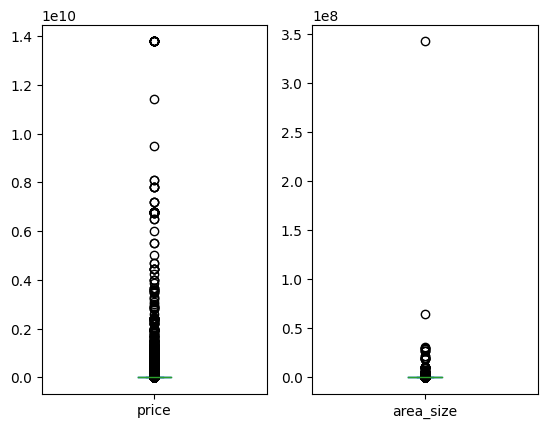

In [19]:
# Plot the price and area size of properties using boxplot
plt.figure()
plt.subplot(1,2,1)
df['price'].plot(kind='box')
plt.subplot(1,2,2)
df['area_size'].plot(kind='box')

We can see that both columns contain many outliers or extreme values, so we can't get any informative insights from it. Since the results are being heavily skewed by the outliers, we need to remove those outliers.

Before removing the outliers, we can also use the IQR method to detect and show the outliers in the dataframe by creating a function.

In [20]:
# Create a function that displays the outliers
def show_outliers(data, col_name):
    Q1 = data[col_name].quantile(0.25)  #First quartile
    Q3 = data[col_name].quantile(0.75)  #Third quartile
    IQR = Q3 - Q1   #Interquartile range
    lower_bound  = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col_name] < lower_bound) | (data[col_name] > upper_bound)]
    return outliers

# Identify top 5 outliers using the function
show_outliers(df, 'price').head()

,transaction_id,trans_group,procedure_name,date,property_type,property_sub_type,property_usage,reg_type,area_name,building_name,project_name,master_project,nearest_landmark,nearest_metro,nearest_mall,rooms,has_parking,area_size,price,meter_sale_price,rent_value,meter_rent_price,year,month
0,3-9-2006-163,Gifts,Grant,2006-10-16,Villa,NaN,Residential,Existing Properties,Mankhool,NaN,NaN,NaN,Burj Khalifa,ADCB Metro Station,Dubai Mall,NaN,0,3162.420000,12000000.000000,3794.560000,NaN,NaN,2006,10
10,2-14-2010-301,Mortgages,Modify Mortgage,2010-07-01,Building,NaN,Residential / Commercial,Existing Properties,Al Suq Al Kabeer,NaN,NaN,NaN,Dubai International Airport,Al Ghubaiba Metro Station,Dubai Mall,NaN,0,964.150000,42537080.000000,44118.740000,NaN,NaN,2010,7
11,3-9-2008-90,Gifts,Grant,2008-06-23,Building,NaN,Residential / Commercial,Existing Properties,Al Suq Al Kabeer,NaN,NaN,NaN,Dubai International Airport,Al Ghubaiba Metro Station,Dubai Mall,NaN,0,960.990000,50000000.000000,52029.680000,NaN,NaN,2008,6
13,2-14-2012-811,Mortgages,Modify Mortgage,2012-11-26,Building,NaN,Residential / Commercial,Existing Properties,Al Hamriya,NaN,NaN,NaN,Dubai International Airport,Burjuman Metro Station,Dubai Mall,NaN,0,5102.230000,46112000.000000,9037.620000,NaN,NaN,2012,11
17,1-11-2022-26663,Sales,Sell,2022-10-31,Villa,NaN,Residential,Existing Properties,Al Satwa,NaN,NaN,NaN,Burj Khalifa,Trade Centre Metro Station,Dubai Mall,NaN,0,232.260000,5700000.000000,24541.460000,NaN,NaN,2022,10


Now, I will create a function that filters out the outliers from the dataframe using the Interquartile Range (IQR) method. This helps to avoid extreme values from skewing the box plot and concealing the distribution of property prices and area size. Then I will create a new dataframe without the outliers.

In [21]:
# Create a function that removes outliers using the Interquartile Range method
def drop_outliers(data, col_name):
    Q1 = data[col_name].quantile(0.25)  #First quartile
    Q3 = data[col_name].quantile(0.75)  #Third quartile
    IQR = Q3 - Q1   #Interquartile range
    lower_bound  = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = data[(data[col_name] > lower_bound) & (data[col_name] < upper_bound)]
    # filtered_df = data[~((data[col_name] < lower_bound) | (data[col_name] > upper_bound))]
    filtered_df.reset_index(drop=True, inplace=True)    #reset index after dropping rows
    return filtered_df

In [22]:
# Remove outliers from the price column
new_df = drop_outliers(df,'price')
new_df.shape

(1251118, 24)

In [23]:
# Remove outliers from the area size column
new_df = drop_outliers(new_df,'area_size')
new_df

,transaction_id,trans_group,procedure_name,date,property_type,property_sub_type,property_usage,reg_type,area_name,building_name,project_name,master_project,nearest_landmark,nearest_metro,nearest_mall,rooms,has_parking,area_size,price,meter_sale_price,rent_value,meter_rent_price,year,month
0,3-9-2019-2944,Gifts,Grant,2019-11-13,Land,NaN,Residential,Existing Properties,Mankhool,NaN,NaN,NaN,Burj Khalifa,ADCB Metro Station,Dubai Mall,NaN,0,209.090000,916659.000000,4384.040000,NaN,NaN,2019,11
1,2-13-2020-9477,Mortgages,Mortgage Registration,2020-11-30,Building,NaN,Residential,Existing Properties,Al Bada,NaN,NaN,NaN,Burj Khalifa,Trade Centre Metro Station,Dubai Mall,NaN,0,278.710000,2500000.000000,8969.900000,NaN,NaN,2020,11
2,2-13-2007-1077,Mortgages,Mortgage Registration,2007-06-07,Building,NaN,Residential,Existing Properties,Al Karama,NaN,NaN,NaN,Burj Khalifa,ADCB Metro Station,Dubai Mall,NaN,0,211.350000,1849364.000000,8750.240000,NaN,NaN,2007,6
3,2-13-2006-578,Mortgages,Mortgage Registration,2006-05-15,Building,NaN,Residential,Existing Properties,Al Karama,NaN,NaN,NaN,Burj Khalifa,ADCB Metro Station,Dubai Mall,NaN,0,211.350000,1200000.000000,5677.790000,NaN,NaN,2006,5
4,1-11-2023-24638,Sales,Sell,2023-08-18,Building,NaN,Residential,Existing Properties,Al Karama,NaN,NaN,NaN,Burj Khalifa,ADCB Metro Station,Dubai Mall,NaN,0,211.350000,5000000.000000,23657.440000,NaN,NaN,2023,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090977,2-13-2024-8674,Mortgages,Mortgage Registration,2024-05-02,Unit,Flat,Residential,Existing Properties,Al Merkadh,"Mohammed Bin Rashid Al Maktoum City, District ...","Mohammed Bin Rashid Al Maktoum City , District...",Mohammed Bin Rashid AL Maktoum City -District ...,NaN,NaN,NaN,1 B/R,1,71.280000,800000.000000,11223.340000,NaN,NaN,2024,5
1090978,2-105-2024-141,Mortgages,Mortgage Pre-Registration,2024-04-26,Unit,Flat,Residential,Off-Plan Properties,Al Merkadh,Azizi Riviera 43,Azizi Riviera 43,Meydan One Community,Downtown Dubai,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,2 B/R,1,71.930000,821940.000000,11426.940000,NaN,NaN,2024,4
1090979,3-9-2023-3017,Gifts,Grant,2023-05-25,Unit,Office,Commercial,Existing Properties,Al Thanyah First,I RISE TOWER,I - RISE TOWER,Barsha Heights,Burj Al Arab,Dubai Internet City,Mall of the Emirates,Office,1,221.040000,2206192.000000,9980.970000,NaN,NaN,2023,5
1090980,3-9-2018-2344,Gifts,Grant,2018-08-14,Unit,Office,Commercial,Existing Properties,Business Bay,Tamani Arts Office,TAMANI ARTS OFFICES,Business Bay,Downtown Dubai,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Office,1,40.850000,439705.000000,10763.890000,NaN,NaN,2018,8


## Data Visualization
Now that we have a new dataframe with outliers removed, we can create different kinds of visualizations to explore the dataset further and then answer the business questions. First, we'll plot the price and area size with a boxplot to see if there are still some outliers remaining.

<Axes: >

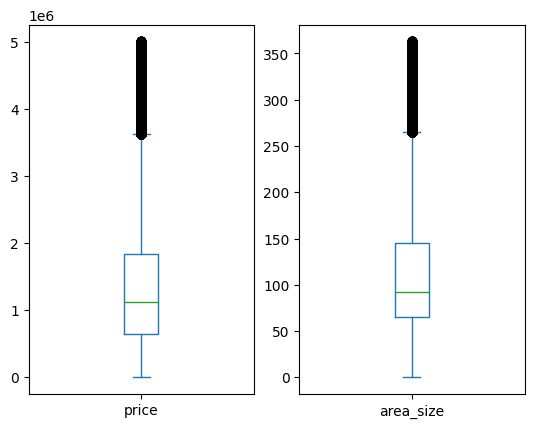

In [24]:
# Plot the new dataframe using boxplot
plt.figure()
plt.subplot(1,2,1)
new_df['price'].plot(kind='box')
plt.subplot(1,2,2)
new_df['area_size'].plot(kind='box')

It looks like the boxplot is still showing some outliers, but it's enough to see the minimum and maximum values of the two columns. Based on the boxplot above, we can see that the median value of the price is a little over 1 million while the area size is less than 100. To see the actual values, we can use the `describe()` method which provides a descriptive statistics of the two columns.

In [25]:
# Descriptive statistics on the price and area size
new_df[['price','area_size']].describe()

,price,area_size
count,1090982.000000,1090982.000000
mean,1375830.453515,113.303579
std,954409.824713,69.313344
min,1.000000,0.010000
25%,650000.000000,65.300000
50%,1120000.000000,92.530000
75%,1840000.000000,145.110000
max,5014250.000000,363.130000


### Data Distribution
Use histogram to visualize the data distribution of price and area size for residential type properties.

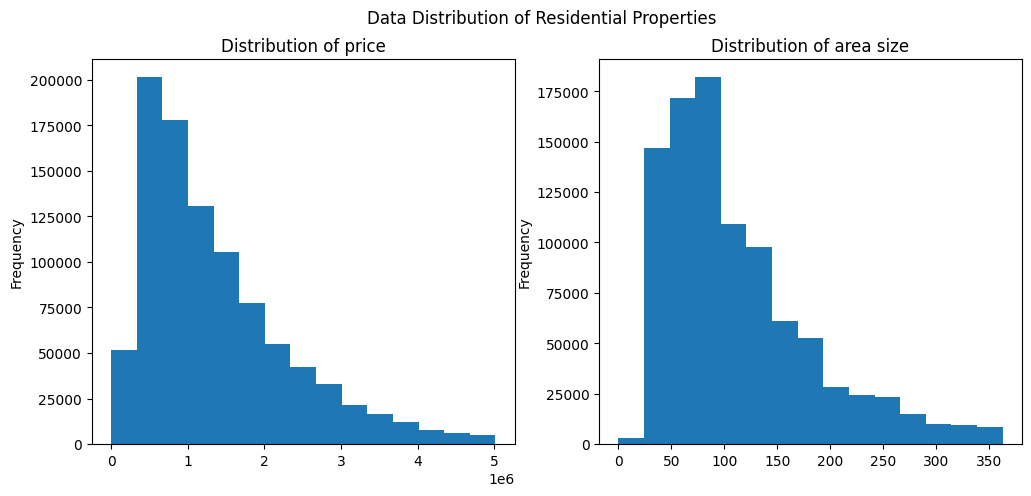

In [26]:
# Filter the dataframe with only the residential properties
residential_df = new_df[new_df['property_usage']=='Residential']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
residential_df['price'].plot(kind='hist', bins=15)
plt.title('Distribution of price')
plt.subplot(1,2,2)
residential_df['area_size'].plot(kind='hist', bins=15)
plt.title('Distribution of area size')
plt.suptitle('Data Distribution of Residential Properties')
plt.show()

## Answering Business Questions

### 1. What areas have the highest and lowest average price for residential properties?

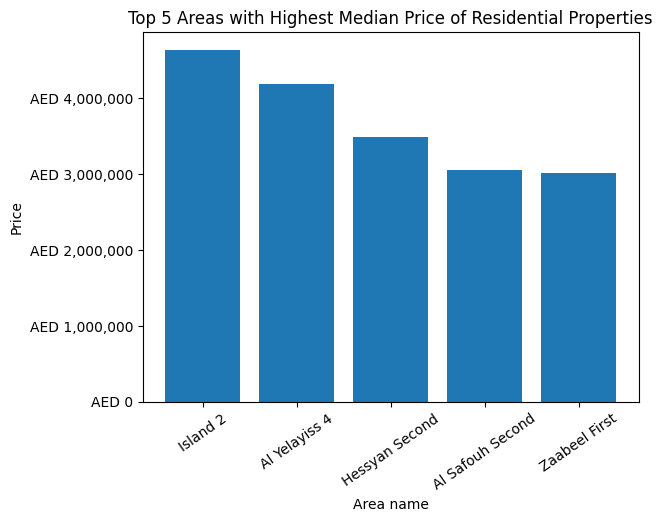

In [27]:
# Group the average price by area
top_5 = residential_df.groupby('area_name')['price'].median().sort_values(ascending=False).head()

# Plot the area with number of highest transaction
fig,ax = plt.subplots()
ax.bar(top_5.index, top_5.values)
ax.set_title('Top 5 Areas with Highest Median Price of Residential Properties')
ax.set_xlabel('Area name')
ax.set_ylabel('Price')
ax.yaxis.set_major_formatter("AED {x:,.0f}")
plt.xticks(rotation=35)
plt.show()

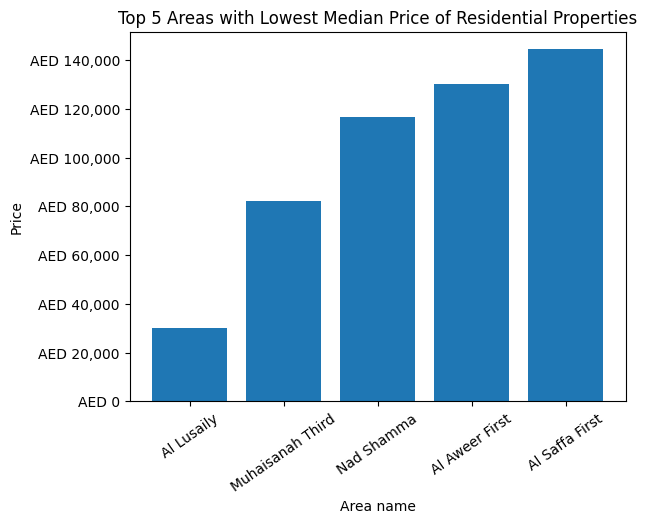

In [28]:
# Group the average price by area
top_5 = residential_df.groupby('area_name')['price'].median().sort_values(ascending=True).head()

# Plot the area with number of highest transaction
fig,ax = plt.subplots()
ax.bar(top_5.index, top_5.values)
ax.set_title('Top 5 Areas with Lowest Median Price of Residential Properties')
ax.set_xlabel('Area name')
ax.set_ylabel('Price')
ax.yaxis.set_major_formatter("AED {x:,.0f}")
plt.xticks(rotation=35)
plt.show()

### 2. How have number of property transactions changed over time?

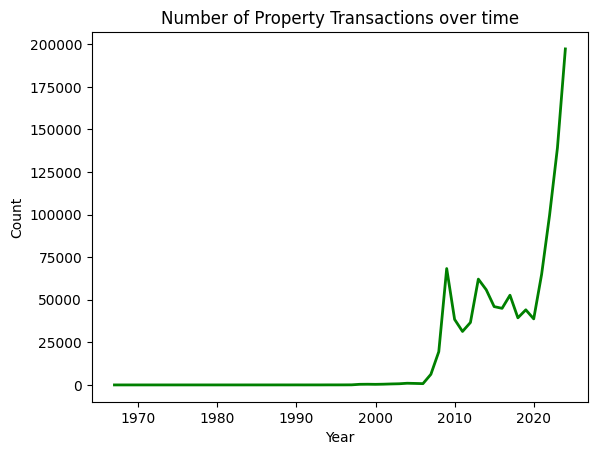

In [29]:
# Find the years with the highest number of property transactions
new_df['year'].value_counts().sort_index().plot(color='green', linewidth=2)
plt.title('Number of Property Transactions over time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The line chart shows two steep lines with a significant increase in number of transactions which is in the year 2008 and 2020. 

### 3. How have residential property prices changed over time?

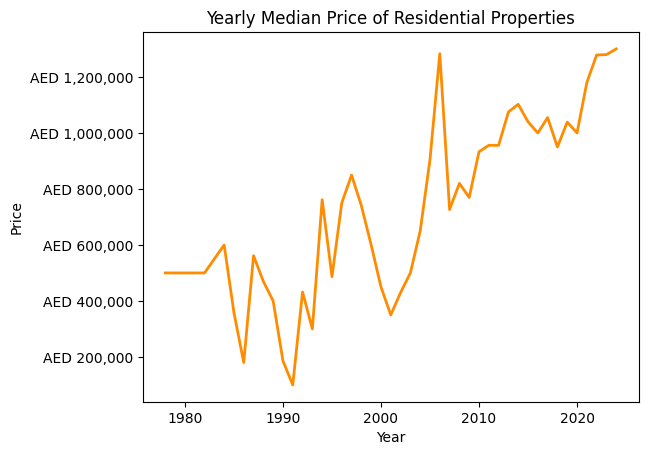

In [30]:
# Group the average price by year
yearly_plot = residential_df.groupby('year')['price'].median()

# Plot the property price over time
fig,ax = plt.subplots()
ax.plot(yearly_plot, color='darkorange', linewidth=2)
ax.set_title('Yearly Median Price of Residential Properties')
ax.set_xlabel('Year')
ax.set_ylabel('Price')

# Format the y-axis label as currency
ax.yaxis.set_major_formatter("AED {x:,.0f}")
plt.show()

Here we can also see a significant increase in median price of residential properties starting from 2001.

#### 3.1 Are there any seasonal patterns in property prices?

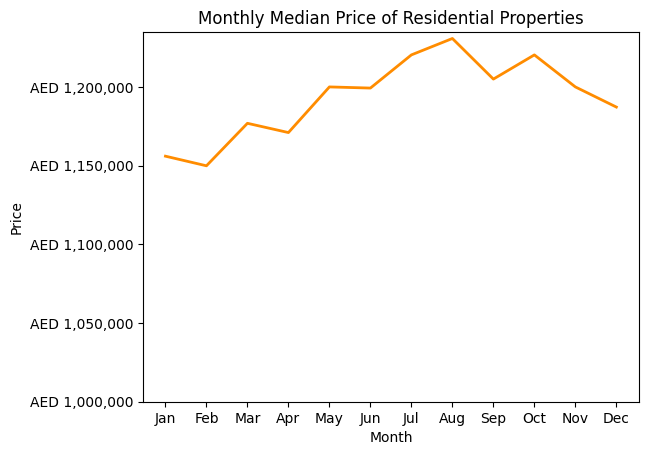

In [31]:
# Group the average price by month
year_2023 = new_df[new_df['year']>=2014]
monthly_plot = year_2023.groupby('month')['price'].median()

# Plot the residential properties price over time
fig,ax = plt.subplots()
ax.plot(monthly_plot, color='darkorange', linewidth=2)
ax.set_title('Monthly Median Price of Residential Properties')
ax.set_xlabel('Month')
ax.set_ylabel('Price')
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_plot.index, month_names)


# Format the y-axis label as currency
ax.yaxis.set_major_formatter("AED {x:,.0f}")
ax.set_ylim(1000000,)
plt.show()

A trend in the line chart shows that the median price of residential properties is highest in the middle of the year.

### 4. What is the proportion of residential properties in 2023?

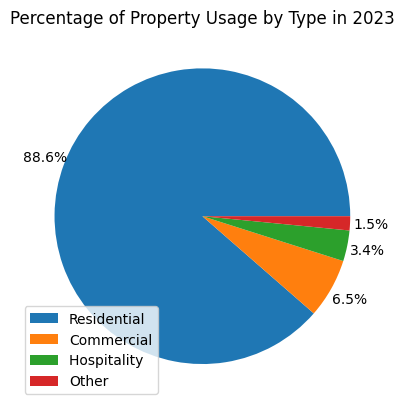

In [32]:
# Filter the year 2023 and get the value counts
year_2023 = new_df[new_df['year']==2023]
pie_plot = year_2023['property_usage'].value_counts()

# Group the types with less than 500 transactions into 'Other' type
dict = {'Other':0}
for i,v in zip(pie_plot.index, pie_plot.values):
    if v < 500:
        dict['Other'] += v
    else:
        dict[i] = v
pie_plot1 = pd.Series(dict).sort_values(ascending=False)

# Plot the property usage using pie chart
plt.pie(pie_plot1,autopct='%1.1f%%', pctdistance=1.14 )
plt.title('Percentage of Property Usage by Type in 2023')
plt.legend(pie_plot1.index, loc='lower left')
plt.show()

Based on the pie chart above, properties for residential use accounts for 92.1% of the total transactions in 2023.

#### 4.1 What are the proportions of different types of residential properties?

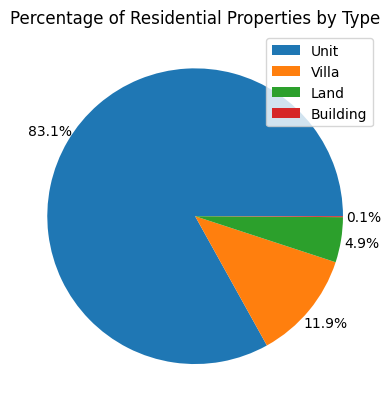

In [33]:
# Identify different types of property
pie_plot = year_2023['property_type'].value_counts()

# Distribution of transactions by type of property
plt.pie(pie_plot,autopct='%1.1f%%', pctdistance=1.14)
plt.title('Percentage of Residential Properties by Type')
plt.legend(pie_plot.index)
plt.show()

We can see that the Unit-type properties accounts for 83% of the total transactions in 2023.

## Correlation
Finding out if there is a strong relationship between price and area size for Flat-type properties using a scatter plot.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


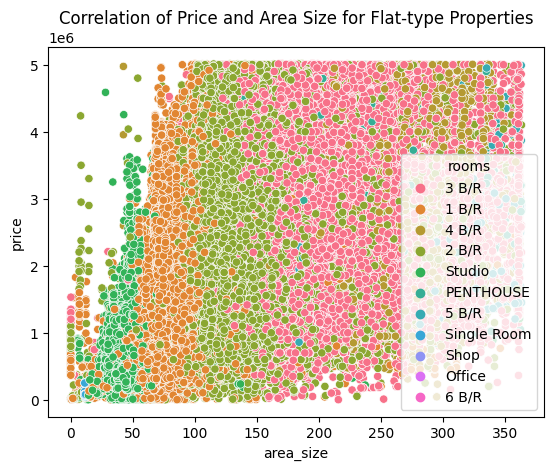

In [34]:
# Filter the flat type properties
flat_df = new_df[new_df['property_sub_type']=='Flat']

# Plot the price and area size using scatterplot
sns.scatterplot(flat_df, x='area_size', y='price', hue='rooms')
plt.title('Correlation of Price and Area Size for Flat-type Properties')
plt.show()

With over a million data points, it's hard to see the general trend of the data. In this case, we can use the `regplot()` or regression plot to identify whether there is a correlation between the price and area size or not.

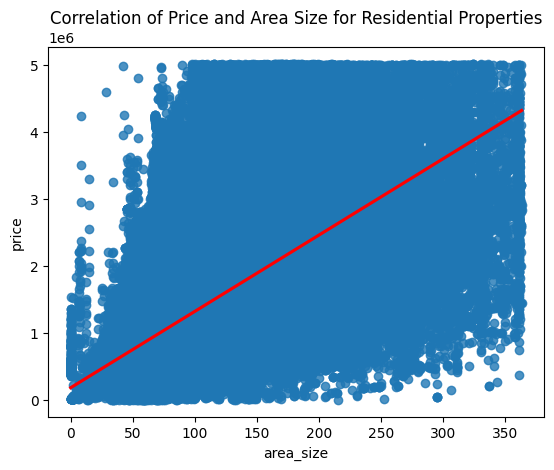

In [35]:
sns.regplot(flat_df, x='area_size', y='price', line_kws={'color':'red'})
plt.title('Correlation of Price and Area Size for Residential Properties')
plt.show()

The line in the regression plot above indicates a strong positive relationship between the price and area size for residential properties. We can use the pandas `corr()` method to see the actual value of correlation coefficient.

In [36]:
flat_df[['price','area_size']].corr()

,price,area_size
price,1.000000,0.625688
area_size,0.625688,1.000000


A correlation coefficient of 0.628 means there is a strong correlation between the two variables. The area size (sqm) of the property is a good feature for predicting the price of residential properties in Dubai.